In [1]:
import bnlearn as bn
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))


../resources/dataset_a_2021v2.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/~$dataset_a_2021v2.xlsx


In [2]:
df = pd.read_csv('../resources/dataset_unab_ORIGINAL SIN P1.csv')
#df = pd.read_csv('../resources/dataset_unab_P1.csv')
#df = pd.read_excel(open('../resources/dataset_a_2021v2.xlsx','rb'))
df.head()

,rut,t1,r1,p1,s1,l1,t2,r2,p2,s2,...,pt,game_score,score,score_a,score_p,score_d,score_s,programa,sol1,estado
0,179,26.500.862,1,1,[3 3 ] [1 1 2 2 2 ],7,167.471.077,3,10,[2 3 3 3 3 ] [1 1 1 1 2 ],...,43,1.874.461.038,8,5,3,3,2,INGENIERIA EN COMPUTACION E INFORMATICA,5.9,A
1,195,626.875.896,1,1,[3 3 3 ] [2 1 1 2 ],7,1.405.363.876,9,8,[2 3 3 3 3 3 ] [1 1 1 1 ],...,25,1.526.019.867,6,4,2,3,2,INGENIERIA CIVIL INDUSTRIAL,6.7,A
2,218,4.895.157.267,2,8,[3 3 3 0 0 3 3 ] [],7,1.148.441.373,4,36,[2 3 3 3 3 3 0 ] [1 1 1 ],...,141,2.049.771.962,7,5,2,2,3,INGENIERIA EN COMPUTACION E INFORMATICA,5.0,A
3,316,444.682.093,1,16,[3 1 3 3 3 0 3 0 0 ] [],9,507.365.574,2,14,[2 3 3 3 3 3 ] [1 1 1 1 ],...,65,1.498.582.485,7,4,3,2,3,INGENIERIA EN COMPUTACION E INFORMATICA,6.9,A
4,330,2.581.874.334,1,2,[0 3 3 3 ] [2 2 1 ],7,3.928.607.833,2,5,[2 3 3 3 3 ] [1 1 1 1 2 ],...,26,9.693.081.204,5,3,2,2,1,INGENIERIA CIVIL INDUSTRIAL,5.8,A


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


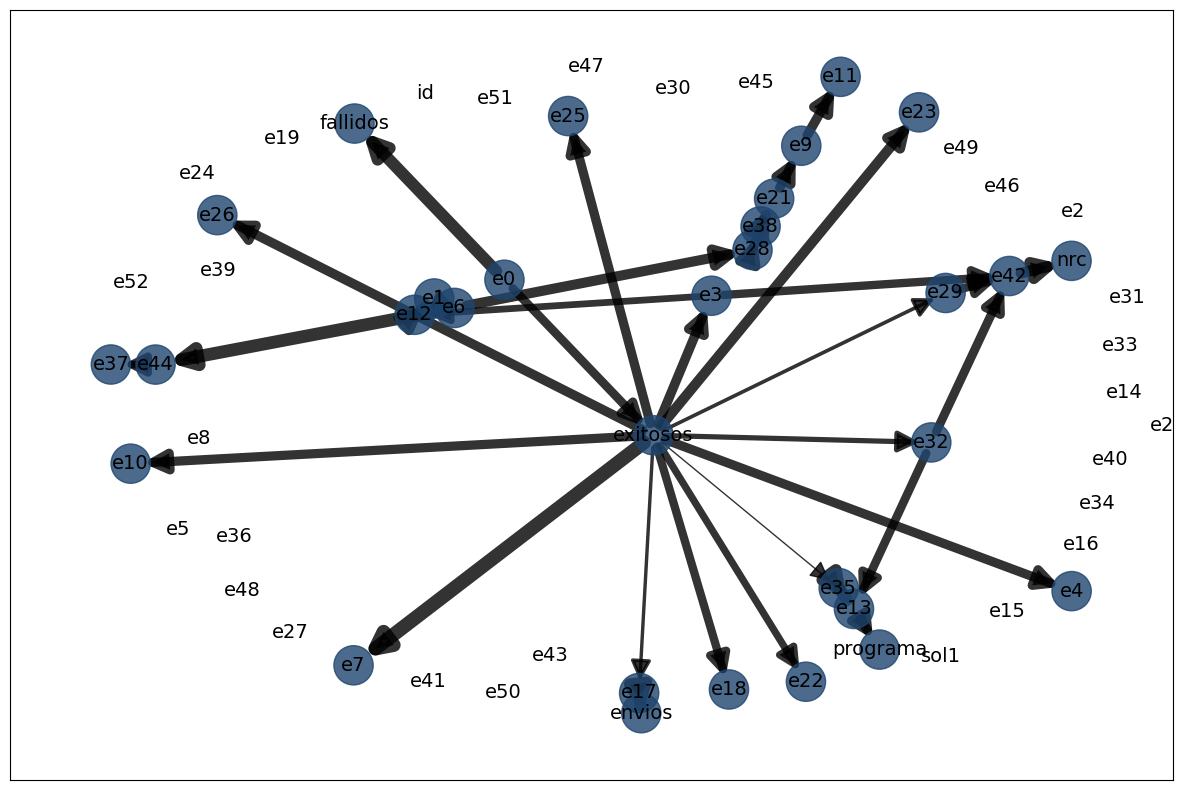

In [4]:
model = bn.structure_learning.fit(df)
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df)
G = bn.plot(model)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


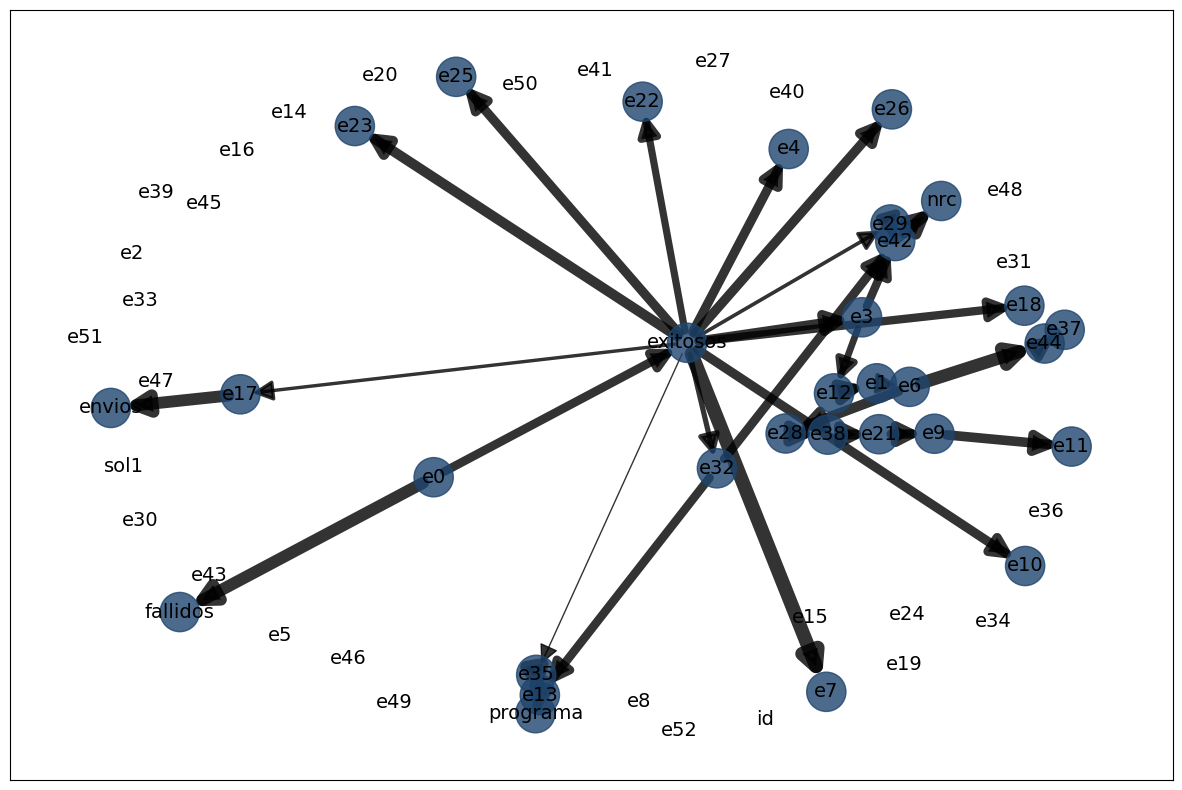

In [5]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_bic = bn.independence_test(model_hc_bic, df)
G = bn.plot(model_hc_bic)

In [ ]:
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_k2 = bn.independence_test(model_hc_k2, df)
G = bn.plot(model_hc_k2)

In [ ]:
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
model_hc_bdeu = bn.independence_test(model_hc_bdeu, df)
G = bn.plot(model_hc_bdeu)

In [3]:
# model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
# model_ex_bic = bn.independence_test(model_ex_bic, df)
# G = bn.plot(model_ex_bic)

[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Warning: Structure learning with more then 15 nodes is computationally not feasable with exhaustivesearch. Use hillclimbsearch or constraintsearch instead!
[bnlearn] >Set scoring type at [bic]


KeyboardInterrupt: 

In [ ]:
# model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
# model_ex_k2 = bn.independence_test(model_ex_k2, df)
# G = bn.plot(model_ex_k2)

In [ ]:
# model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
# model_ex_bdeu = bn.independence_test(model_ex_bdeu, df)
# G = bn.plot(model_ex_bdeu)

In [ ]:
# model_cl = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')
# model_cl = bn.independence_test(model_cl, df)
# G = bn.plot(model_cl)

In [ ]:
# model_tan     = bn.structure_learning.fit(df, methodtype='tan', root_node='Wet_Grass', class_node='Rain')
# model_tan = bn.independence_test(model_tan, df)
# G = bn.plot(model_tan)